In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples = 300,n_features =2,centers=2, cluster_std=1.0,random_state=101)

In [3]:
np.random.seed(101)
X,y = data
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [4]:
feat = pd.DataFrame(X)
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [5]:
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ["x1","x2","x3"]

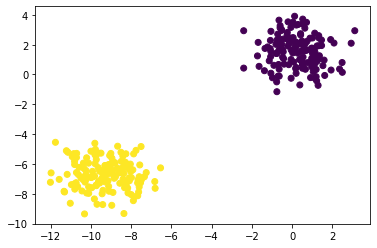

In [6]:
plt.scatter(feat["x1"],feat["x2"],c = y)

In [7]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

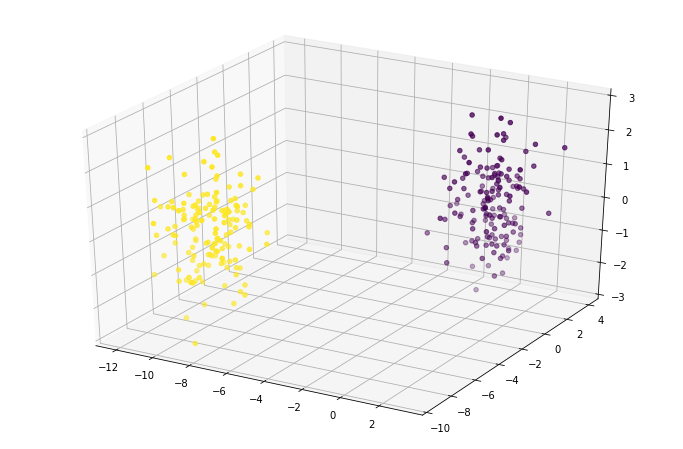

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(feat["x1"],feat["x2"],feat["x3"],c=y)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [12]:
encoder = Sequential()
encoder.add(Dense(2,activation="relu",input_shape=[3]))

In [14]:
decoder = Sequential()
decoder.add(Dense(units=3,activation="relu",input_shape=[2]))

In [16]:
autoencoder = Sequential([encoder,decoder])

In [17]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_data = sc.fit_transform(feat)

In [19]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 942us/step - loss: 0.1745
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1309
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1267
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0665
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0161


In [20]:
encoded_2_dim = encoder.predict(scaled_data)
encoded_2_dim.shape

(300, 2)

In [21]:
feat.shape

(300, 3)

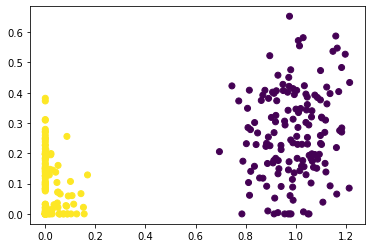

In [24]:
plt.scatter(encoded_2_dim[:,0],encoded_2_dim[:,1],c=y)